In [1]:
%pip install opencv-python
%pip install face-alignment
%pip install MTCNN

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Necessary libraries

In [2]:
import cv2 as cv
import torch
from face_alignment import FaceAlignment
from face_alignment import LandmarksType
import os
import matplotlib.pyplot as plt


In [3]:
def displayCameraWithLandmark():
    cap = cv.VideoCapture(0)

    # Face detector option can be blazeface, sfd, or dlib (must install with visual studio C++)
    model = FaceAlignment(landmarks_type= LandmarksType.TWO_D, face_detector='blazeface', face_detector_kwargs={'back_model': True},device='cpu')
    total_frames = int (5*30)
    frames = [None]*total_frames
    count = 0 
    while count < total_frames:
        ret, frame = cap.read()
        frames[count] = frame
        # faces = model.get_landmarks(frame)

        # if faces is not None:
        #     # Iterate over the detected faces
        #     for pred in faces:
        #         # Draw landmarks on the frame
        #         for point in pred:
        #             x, y = point
        #             if 0 <= x < frame.shape[1] and 0 <= y < frame.shape[0]:
        #                 cv.circle(frame, (int(x), int(y)), 2, (0, 255, 0), -1)
        count += 1
        cv.imshow('OpenCv',frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()
    return frames
    

In [8]:
while(True):	

    start = True if (str(input("Start? (Y/n) :"))).lower() == "y" else False

    if (start):
        frames = displayCameraWithLandmark()
        break

In [9]:
if not os.path.exists("rawFrames"):
    os.mkdir("rawFrames")    

for i in range(len(frames)):
    cv.imwrite(f'{"rawFrames"}\my_video_frame_{i}.png', frames[i])


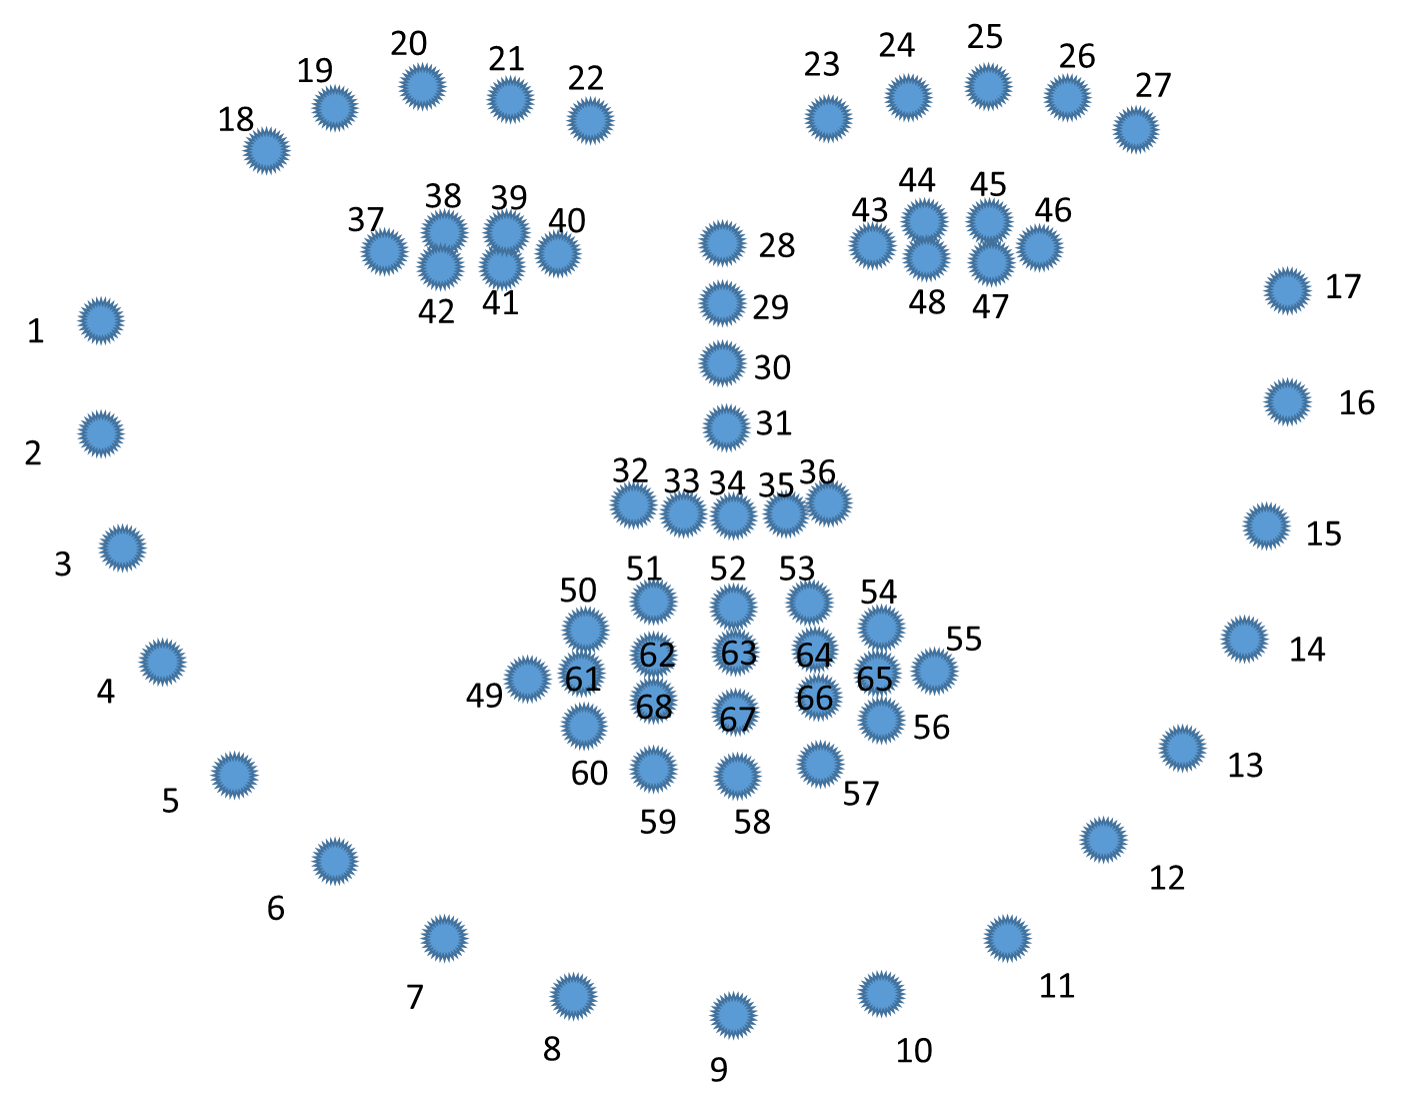

For reference the index of each landmark detected 

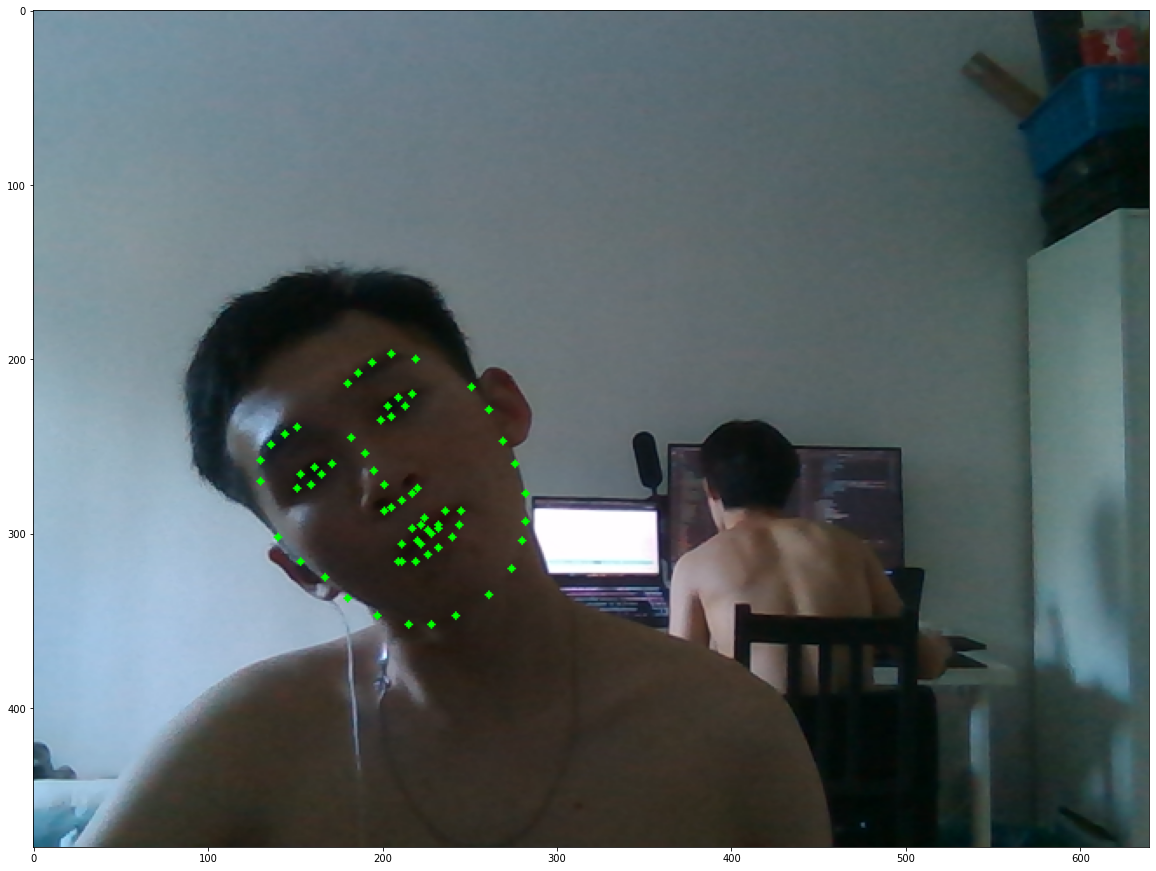

In [101]:
model = FaceAlignment(landmarks_type= LandmarksType.TWO_D, face_detector='blazeface', face_detector_kwargs={'back_model': True},device='cpu')
n = 7
img = (frames[n])
img = img.copy()
landmarks = model.get_landmarks(img)
landmarks_tuple=[]
if landmarks is not None:
            # Iterate over the detected faces
            for pred in landmarks:
                # Draw landmarks on the frame
                for point in pred:
                    x, y = point
                    landmarks_tuple.append((int(x),int(y)))
                    if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
                        cv.circle(img, (int(x), int(y)), 2, (0, 255, 0), -1)

plt.figure(figsize=(20,20))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))


In [88]:
routes = [i for i in range (16,-1,-1)] + [i for i in range (17,26+1)]
routes_cod = []

In [89]:
import numpy as np
img = (frames[n])
img = img.copy()
for i in range (0, len(routes)-1):
    source_point = routes[i]
    target_point = routes[i+1]
    
    source_cod = landmarks_tuple[source_point]
    target_cod = landmarks_tuple[target_point]
    routes_cod.append(source_cod)
    cv.line(img, (source_cod), (target_cod),(255,255,255),2)



In [90]:
routes_cod = routes_cod+[routes_cod[0]]
plt.figure(figsize=(20,20))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [93]:
mask = np.zeros((img.shape[0],img.shape[1]))
mask = cv.fillConvexPoly(mask, np.array(routes_cod),1)
mask= mask.astype(np.bool_)
out = np.zeros_like(img)
out[mask] = img[mask]
plt.figure(figsize=(20,20))
plt.imshow(cv.cvtColor(out,cv.COLOR_BGR2RGB))


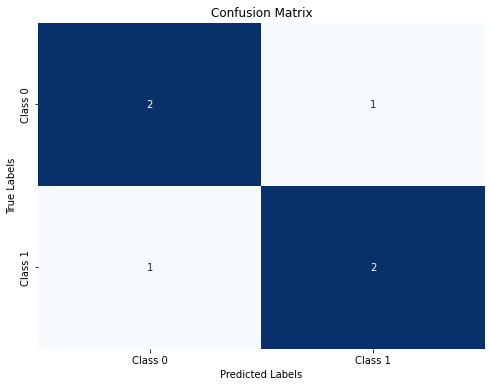

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels
true_labels = [0, 1, 0, 1, 0, 1]
predicted_labels = [0, 1, 1, 1, 0, 0]

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])

# Show the plot
plt.show()


In [ ]:
import math
for i in range(len(frames)):
    img = frames[i]
    landmarkTuple = self.framesLandmark[i]
    # Landmark index of reight eye and left eye are
    right_eye_cood = [landmarkTuple[40][0]-landmarkTuple[37][0],landmarkTuple[40][1]-landmarkTuple[37][1]]
    left_eye_cood = [landmarkTuple[46][0]-landmarkTuple[43][0],landmarkTuple[46][1]-landmarkTuple[43][1]]
    x1,y1 = right_eye_cood
    x2,y2 = left_eye_cood
    
    a = y1-y2
    b = x2-x1
    c = math.sqrt(a*a + b*b)
    cos_alpha = (b*b + c*c -a*a)/(2*b*c)
    alpha = np.arccos(cos_alpha)
    alpha = (alpha * 180)/math.pi
    aligned_img = Image.fromarray(img)
    aligned_img = np.array(aligned_img.rotate(alpha))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))